In [1]:
from keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000)

x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=120)
x_val = sequence.pad_sequences(x_val, maxlen=120)
x_test = sequence.pad_sequences(x_test, maxlen=120)

print(x_train)

Using TensorFlow backend.


[[  0   0   0 ...  15  17  12]
 [  0   0   0 ... 505  17  12]
 [ 11  14  12 ...  11  17  12]
 ...
 [  0   0   0 ... 285  17  12]
 [  0   0   0 ...  82  17  12]
 [  0   0   0 ...   8  17  12]]


Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 14s 2ms/step - loss: 1.9172 - acc: 0.5293 - val_loss: 1.4451 - val_acc: 0.6640
Epoch 2/10
7000/7000 [==============================] - 13s 2ms/step - loss: 0.8462 - acc: 0.8087 - val_loss: 1.2990 - val_acc: 0.7053
Epoch 3/10
7000/7000 [==============================] - 13s 2ms/step - loss: 0.2856 - acc: 0.9500 - val_loss: 1.3356 - val_acc: 0.6998
Epoch 4/10
7000/7000 [==============================] - 13s 2ms/step - loss: 0.1880 - acc: 0.9610 - val_loss: 1.3614 - val_acc: 0.6917
Epoch 5/10
7000/7000 [==============================] - 13s 2ms/step - loss: 0.1497 - acc: 0.9623 - val_loss: 1.3367 - val_acc: 0.6993
Epoch 6/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.1331 - acc: 0.9616 - val_loss: 1.3427 - val_acc: 0.7023
Epoch 7/10
7000/7000 [==============================] - 14s 2ms/step - loss: 0.1217 - acc: 0.9616 - val_loss: 1.4113 - val_acc: 0.6897
Epoch 8

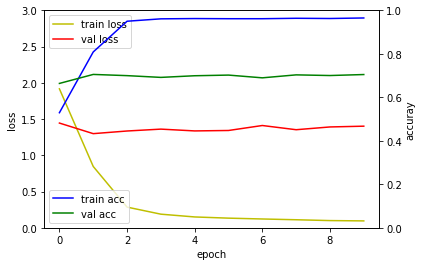

2246/2246 [==============================] - 1s 238us/step
## evaluation loss and_metrics ##
[1.426748350912826, 0.6985752448797863]


In [2]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 49s 7ms/step - loss: 2.5059 - acc: 0.3854 - val_loss: 2.0355 - val_acc: 0.4929
Epoch 2/10
7000/7000 [==============================] - 48s 7ms/step - loss: 1.9557 - acc: 0.4883 - val_loss: 2.1053 - val_acc: 0.3865
Epoch 3/10
7000/7000 [==============================] - 46s 7ms/step - loss: 1.7305 - acc: 0.5404 - val_loss: 1.6728 - val_acc: 0.5610
Epoch 4/10
7000/7000 [==============================] - 44s 6ms/step - loss: 1.5623 - acc: 0.5814 - val_loss: 1.6028 - val_acc: 0.5777
Epoch 5/10
7000/7000 [==============================] - 45s 6ms/step - loss: 1.4044 - acc: 0.6203 - val_loss: 1.5764 - val_acc: 0.6029
Epoch 6/10
7000/7000 [==============================] - 46s 7ms/step - loss: 1.2087 - acc: 0.6784 - val_loss: 1.4328 - val_acc: 0.6534
Epoch 7/10
7000/7000 [==============================] - 46s 7ms/step - loss: 1.0072 - acc: 0.7390 - val_loss: 1.4244 - val_acc: 0.6630
Epoch 8

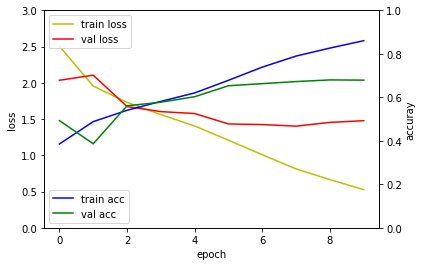

2246/2246 [==============================] - 4s 2ms/step
## evaluation loss and_metrics ##
[1.628060967181266, 0.6460373998749819]


In [3]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 29s 4ms/step - loss: 2.2674 - acc: 0.4507 - val_loss: 1.7577 - val_acc: 0.5257
Epoch 2/10
7000/7000 [==============================] - 27s 4ms/step - loss: 1.5777 - acc: 0.6223 - val_loss: 1.3527 - val_acc: 0.6892
Epoch 3/10
7000/7000 [==============================] - 27s 4ms/step - loss: 1.2434 - acc: 0.7050 - val_loss: 1.1900 - val_acc: 0.7200
Epoch 4/10
7000/7000 [==============================] - 27s 4ms/step - loss: 0.9948 - acc: 0.7594 - val_loss: 1.0844 - val_acc: 0.7492
Epoch 5/10
7000/7000 [==============================] - 29s 4ms/step - loss: 0.7743 - acc: 0.8120 - val_loss: 1.0393 - val_acc: 0.7558
Epoch 6/10
7000/7000 [==============================] - 28s 4ms/step - loss: 0.5864 - acc: 0.8527 - val_loss: 1.0420 - val_acc: 0.7608
Epoch 7/10
7000/7000 [==============================] - 26s 4ms/step - loss: 0.4536 - acc: 0.8874 - val_loss: 1.0996 - val_acc: 0.7578
Epoch 8

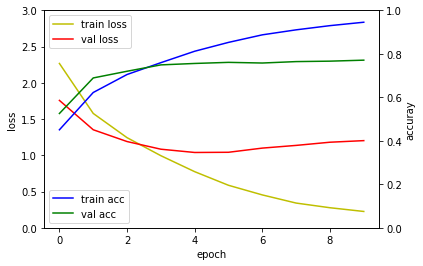

2246/2246 [==============================] - 1s 660us/step
## evaluation loss and_metrics ##
[1.2345870360665734, 0.7631344613175465]


In [5]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Using TensorFlow backend.


Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 34s 5ms/step - loss: 2.1500 - acc: 0.4474 - val_loss: 1.7171 - val_acc: 0.5399
Epoch 2/10
7000/7000 [==============================] - 33s 5ms/step - loss: 1.6001 - acc: 0.5847 - val_loss: 1.4809 - val_acc: 0.6261
Epoch 3/10
7000/7000 [==============================] - 33s 5ms/step - loss: 1.2942 - acc: 0.6660 - val_loss: 1.3252 - val_acc: 0.6690
Epoch 4/10
7000/7000 [==============================] - 34s 5ms/step - loss: 1.0193 - acc: 0.7393 - val_loss: 1.2714 - val_acc: 0.6932
Epoch 5/10
7000/7000 [==============================] - 34s 5ms/step - loss: 0.8078 - acc: 0.7974 - val_loss: 1.3218 - val_acc: 0.6963
Epoch 6/10
7000/7000 [==============================] - 33s 5ms/step - loss: 0.6477 - acc: 0.8400 - val_loss: 1.2954 - val_acc: 0.7069
Epoch 7/10
7000/7000 [==============================] - 33s 5ms/step - loss: 0.5475 - acc: 0.8600 - val_loss: 1.3372 - val_acc: 0.7074
Epoch 8

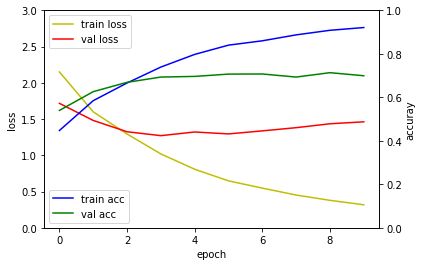

2246/2246 [==============================] - 3s 1ms/step
## evaluation loss and_metrics ##
[1.5035469657272924, 0.6843276937307254]


In [1]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)